### Project Overview: 

A bank wants more people to take loans. The project goal is to use the k - Nearest Neighbor machine learning model to predict whether a new customer will accept a loan offer. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_files/UniversalBank.csv')

### Viewing / Organizing the dataset

In [ ]:
df  #we can see here our target variable is the the "Personal Loan" column. I personally would like to move that to the end. 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
# Moving the Personal Loan column (Target Variable) to the end of the dataframe
df1 = df.pop('Personal Loan')  
df['Personal Loan'] = df1
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


### Analyzing the Data

In [ ]:
df['Personal Loan'].value_counts()   #We can see here in the data that 480 of the 5000 (~11%) customers took a personal loan. Purpose of this insight is to see if we have enough variety in the target variable column to train our
                                     #model appropriately.

0    4520
1     480
Name: Personal Loan, dtype: int64

In [ ]:
print(df[['Personal Loan', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']].value_counts())   #i wanted to see these columns unique values. this will help me determine which columns are considered
                                                                                                                      #categorical or numerical

Personal Loan  Mortgage  Securities Account  CD Account  Online  CreditCard
0              0         0                   0           1       0             1187
                                                         0       0              801
                                                         1       1              478
                                                         0       1              324
                         1                   0           1       0              123
                                                                               ... 
               199       0                   0           1       1                1
                         1                   0           1       0                1
               200       0                   0           1       1                1
               201       0                   0           0       0                1
1              617       0                   0           0       0                1


In [ ]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0


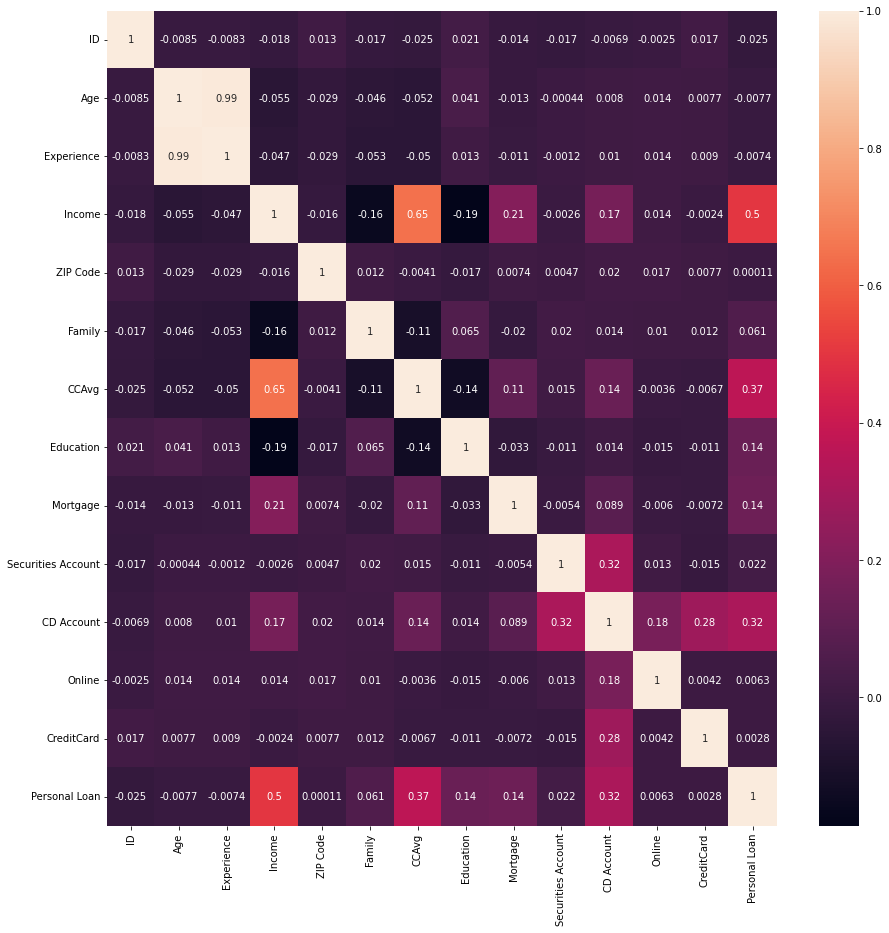

In [ ]:
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True)                #easy to see heatmap of which indenpendent variables are correlated with others (including our target variable)

### Create Training and Testing Dataset

In [ ]:
X_numerical = df[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']]  #data to be normalized
X_binary = df[['Securities Account', 'CD Account', 'Online', 'CreditCard']]       #since this data is 0/1s its good
X_categorical = df[['Education']]                                                 #need to apply OneHotEncoder
y = df[['Personal Loan']]                                                         #our target variable, double brackets to keep df type

In [ ]:
#Normalizing our X_numerical values. 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_numerical_normalized = scaler.fit_transform(X_numerical)
X_numerical_normalized = pd.DataFrame(X_numerical_normalized)
X_numerical_normalized = X_numerical_normalized.rename(columns = {0 : 'Age', 1: 'Experience', 2: 'Income', 3: 'Family', 4: 'CCAvg', 5: 'Mortgage'})

In [ ]:
#Encoding the Education Column
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_categorical_encoded = onehotencoder.fit_transform(X_categorical).toarray()
X_categorical_encoded = pd.DataFrame(X_categorical_encoded)
X_categorical_encoded = X_categorical_encoded.rename(columns = {0 : 'Education_1', 1: 'Education_2', 2: 'Education_3'})

In [ ]:
X_categorical_encoded.head()   #checking to make sure the columns returned okay. (3 unique values should equal 3 columns)

,Education_1,Education_2,Education_3
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [ ]:
#combining the dataframe back together

X_all = pd.concat([X_numerical_normalized, X_binary, X_categorical_encoded], axis = 1)
X_all

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,0.045455,0.086957,0.189815,1.000000,0.16,0.000000,1,0,0,0,1.0,0.0,0.0
1,0.500000,0.478261,0.120370,0.666667,0.15,0.000000,1,0,0,0,1.0,0.0,0.0
2,0.363636,0.391304,0.013889,0.000000,0.10,0.000000,0,0,0,0,1.0,0.0,0.0
3,0.272727,0.260870,0.425926,0.000000,0.27,0.000000,0,0,0,0,0.0,1.0,0.0
4,0.272727,0.239130,0.171296,1.000000,0.10,0.000000,0,0,0,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.136364,0.130435,0.148148,0.000000,0.19,0.000000,0,0,1,0,0.0,0.0,1.0
4996,0.159091,0.152174,0.032407,1.000000,0.04,0.133858,0,0,1,0,1.0,0.0,0.0
4997,0.909091,0.913043,0.074074,0.333333,0.03,0.000000,0,0,0,0,0.0,0.0,1.0
4998,0.954545,0.934783,0.189815,0.666667,0.05,0.000000,0,0,1,0,0.0,1.0,0.0


#### Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size = 0.4, random_state = 1)

In [ ]:
len(X_train)   #training the model on 3000 customers

3000

In [ ]:
len(X_test)    #testing the model on 2000 customers

2000

### Create and Train the Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)  #using 3 as an initial test parameter
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.score(X_test, y_test)

0.9525

### Evaluating the Model

In [ ]:
knn_test = range(1, 11)    #testing different neighbor values, we see that NN = 1 returns the highest accuracy score

for current_nn in knn_test:
  knn = KNeighborsClassifier(n_neighbors= current_nn)
  knn.fit(X_train, y_train.values.ravel())
  score = knn.score(X_test, y_test)
  print('NN = ' + str(current_nn) + ' / score = ' + str(score))


NN = 1 / score = 0.9565
NN = 2 / score = 0.9465
NN = 3 / score = 0.9525
NN = 4 / score = 0.944
NN = 5 / score = 0.949
NN = 6 / score = 0.943
NN = 7 / score = 0.946
NN = 8 / score = 0.942
NN = 9 / score = 0.943
NN = 10 / score = 0.941


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)    #Truth, prediction

Text(69.0, 0.5, 'Truth')

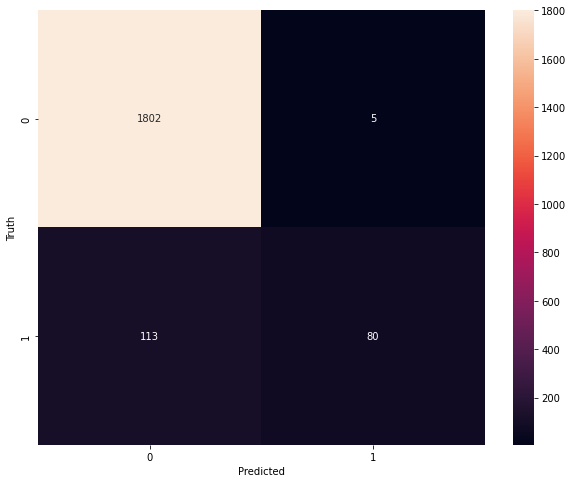

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, fmt = 'g')    #annot = True shows the numbers and fmt = g turns off scientific notation
plt.xlabel('Predicted')
plt.ylabel("Truth")

## Project Questions / Answers

#### Question 1: Age = 40, Experience = 10, Income = 84, Family = 2, CCAvg = 2, Education_1 = 0, Education_2 = 1, Education_3 = 0, Mortgage = 0, Securities Account = 0, CD Account = 0, Online = 1, and Credit Card = 1. Perform a k-NN classification with all predictors except ID and ZIP code using k = 1. Remember to transform categorical predictors with more than two categories into dummy variables first. Specify the success class as 1 (loan acceptance), and use the default cutoff value of 0.5. How would this customer be classified? 

In [ ]:
test_customers = pd.DataFrame(columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education_1', 'Education_2', 'Education_3', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'Credit Card'])

#customer 1 addition
test_customers.loc[len(test_customers.index)] = [40, 10, 84, 2, 2, 0, 1, 0, 0, 0, 0, 1, 1]

customer_1 = test_customers.iloc[0]
customer_1 = customer_1.values.reshape(1, -1)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train.values.ravel())
y_pred1 = knn.predict(customer_1)
if y_pred[0] >= 0.5:
  y_pred[0] == 1
else:
  y_pred[0] == 0

print(y_pred1[0])



1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


#### Q1 Answer: The model predicts that a customer with these paramenters **would** take a personal loan

#### Question 2: What is a choice of k that balances between overfitting and ignoring the predictor information? 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train.values.ravel())
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


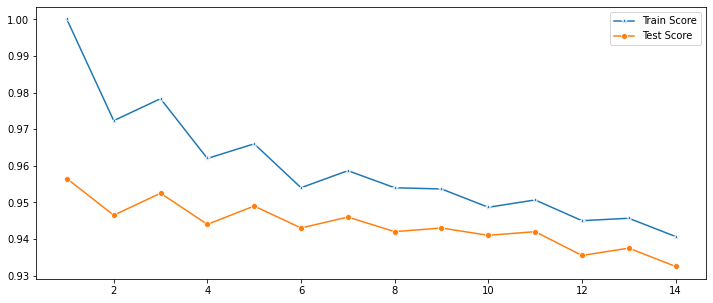

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

#### Q2 Answer: We can see from the line chart that a nn of 1 fits this data the best

#### Question 3: Show the confusion matrix for the validation data that results from using the best k.

Text(69.0, 0.5, 'Truth')

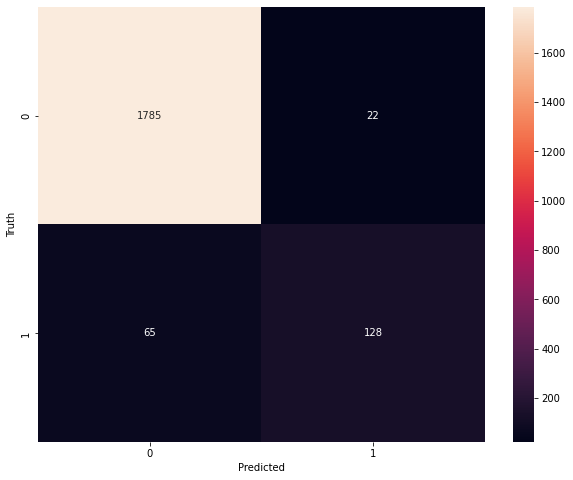

In [ ]:
from sklearn.utils.validation import column_or_1d
knn = KNeighborsClassifier(n_neighbors=1)  #using 1 per the above
knn.fit(X_train, y_train.values.ravel())

y_pred2 = knn.predict(X_test)

cm1 = confusion_matrix(y_test, y_pred2)    #Truth, prediction

plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel("Truth")                        #if we compare this confustion matrix to the one above (using 3 nn) our cm below (using 1 nn) performed better

#### Question 4: Consider the following customer: Age = 40, Experience = 10, Income = 84, Family = 2, CCAvg = 2, Education_1 = 0, Education_2 = 1, Education_3 = 0, Mortgage = 0, Securities Account = 0, CD Account = 0, Online = 1 and Credit Card = 1. Classify the customer using the best k. 

In [ ]:
test_customers.loc[len(test_customers.index)] = [40, 10, 84, 2, 2, 0, 1, 0, 0, 0, 0, 1, 1]

customer_2 = test_customers.iloc[1]
customer_2 = customer_2.values.reshape(1, -1)

y_pred3 = knn.predict(customer_2)
if y_pred3[0] >= 0.5:
  y_pred3[0] == 1
else:
  y_pred3[0] == 0

print(y_pred3[0])

1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


#### Q4 Answer: The model predicts that a customer with these paramenters **would** take a personal loan

#### Question 5: Repartition the data, this time into training, validation, and test sets (50% : 30% : 20%). Apply the k-NN method with the k chosen above. Compare the confusion matrix of the test set with that of the training and validation sets. Comment on the differences and their reason. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size = 0.20, random_state = 5)
X_train2, x_validation, y_train2, y_validation = train_test_split(X_train, y_train, test_size = 0.375, random_state = 5)
print('X_train2 length is: ' + str(len(X_train2)))
print('x_validation length is: ' + str(len(x_validation)))
print('X_test length is: ' + str(len(X_test)))
print(' ')
print('y_train2 length is: ' + str(len(y_train2)))
print('y_validation length is: ' + str(len(y_validation)))
print('y_test length is: ' + str(len(y_test)))                      #Ensuring my lengths match up

X_train2 length is: 2500
x_validation length is: 1500
X_test length is: 1000
 
y_train2 length is: 2500
y_validation length is: 1500
y_test length is: 1000


Text(69.0, 0.5, 'Truth')

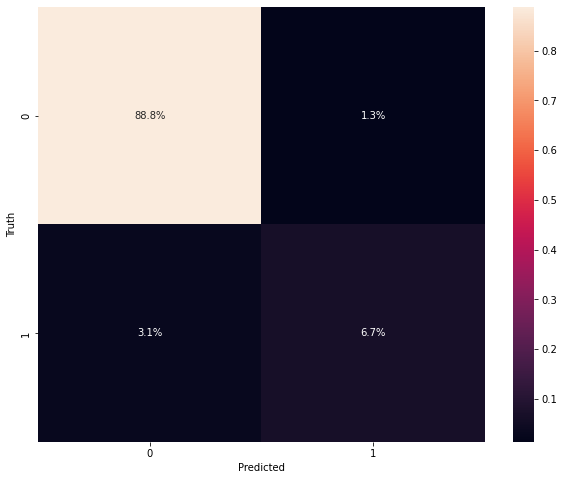

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(X_train2, y_train2.values.ravel())
y_pred3 = knn.predict(x_validation)

cm3 = confusion_matrix(y_validation, y_pred3)    
plt.figure(figsize = (10, 8))
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt = '.1%')
plt.xlabel('Predicted')
plt.ylabel("Truth")                                  #The below Confusion matrix shows the performance of the model on the validation set

Text(69.0, 0.5, 'Truth')

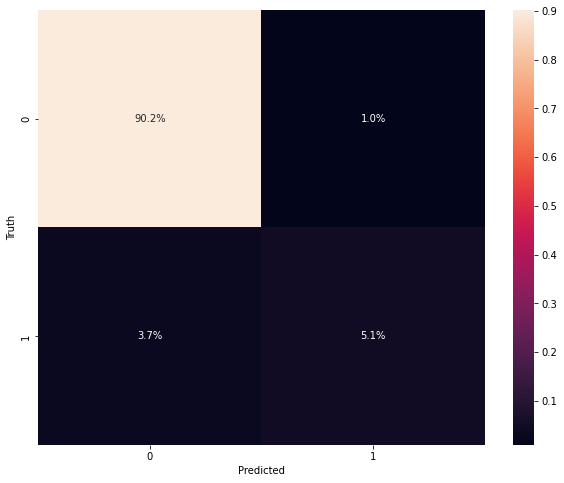

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(X_train2, y_train2.values.ravel())
y_pred4 = knn.predict(X_test)

cm4 = confusion_matrix(y_test, y_pred4)    
plt.figure(figsize = (10, 8))
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt = '.1%')
plt.xlabel('Predicted')
plt.ylabel("Truth")                                  #The below Confusion matrix shows the performance of the model on the test set

##### We can see the confusion matrices above are very similar but the model performing on the validation set did slightly better than the test set. I dont think one can predict wether or not one set (validation/test) will perform better than the other. This is because of the randomness of the data. 